## Assignment 01 - CSCI 31022 - Machine Learning and Pattern Recognition

### Student ID : CS/2020/007

In [ ]:
###### GitHub Link - https://archive.ics.uci.edu/dataset/109/wine

###### Data Set - https://archive.ics.uci.edu/dataset/109/wine

<b>import the necessary libraries </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

<b>Load the Data Set and identify the data set</b>

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

column_names = [
 "Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
 "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
 "Color_intensity", "Hue", "0D280_0D315_of_diluted_wines", "Proline"
]

df = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Number of data rows and number of feature columns that data set have
df.shape

(178, 14)

In [4]:
# # print the first 10 rows of the data set
df.head(10)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


<b>Information about the dataset

In [5]:
# using describe function to get some statistics about dataset

df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# using info function we can obtain the metadata of each feature 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

In [7]:
# available feature(column) names

df.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')

<b> Checking for the null values

In [8]:
# check the null values in dataset

df.isnull().sum()

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

<b> Checking for duplicates

In [9]:
df.duplicated().sum()

0

<b> Counting value count in each class

In [10]:
df['Class'].value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64

<b> Boxplot Visualization </b>


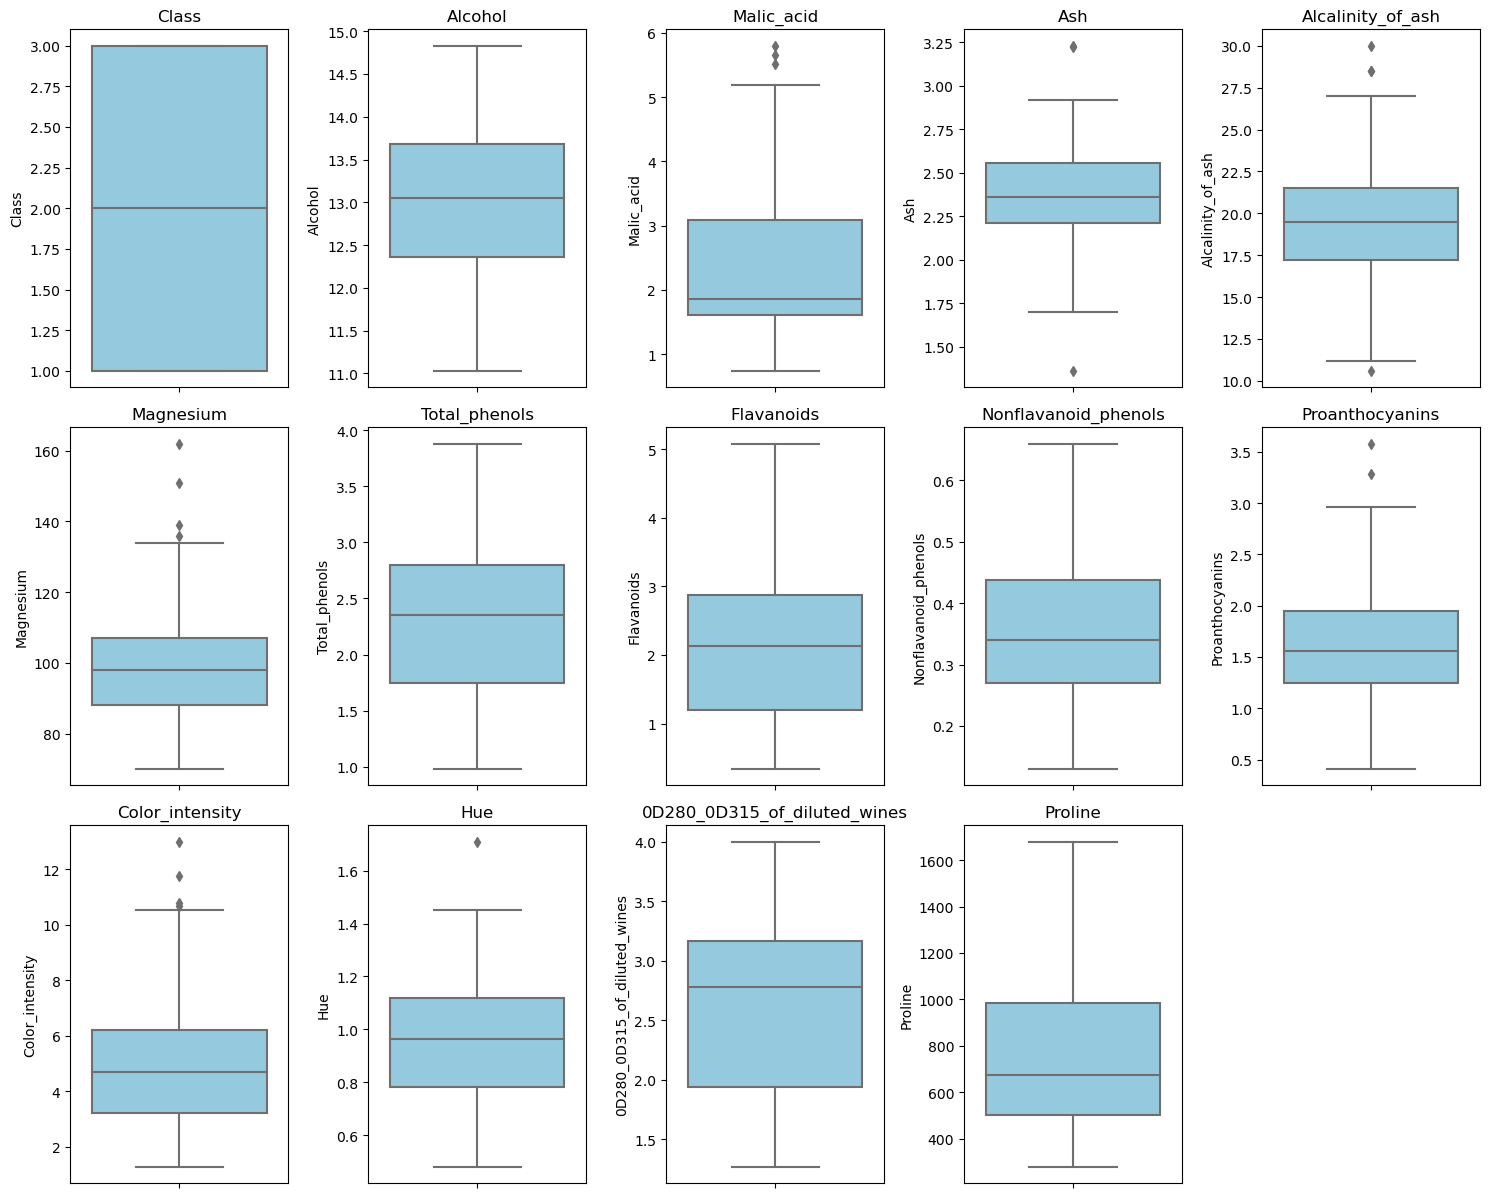

In [11]:
plt.figure(figsize=(15,20))
for i,column in enumerate(df.columns,1):
    plt.subplot(5,5,i)
    sns.boxplot(y=df[column],color="skyblue")
    plt.title(column)
plt.tight_layout()
plt.show()

<b> As this is a small data set we don't remove outliers here

<b> Selecting feature variables

In [15]:
X = df.drop(['Class'], axis="columns")
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<b>Selecting target variables

In [16]:
y = df['Class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

<b>Check for multicollinearity

Text(0.5, 1.0, 'Correlation Matrix (range of -0.75 to 0.75)')

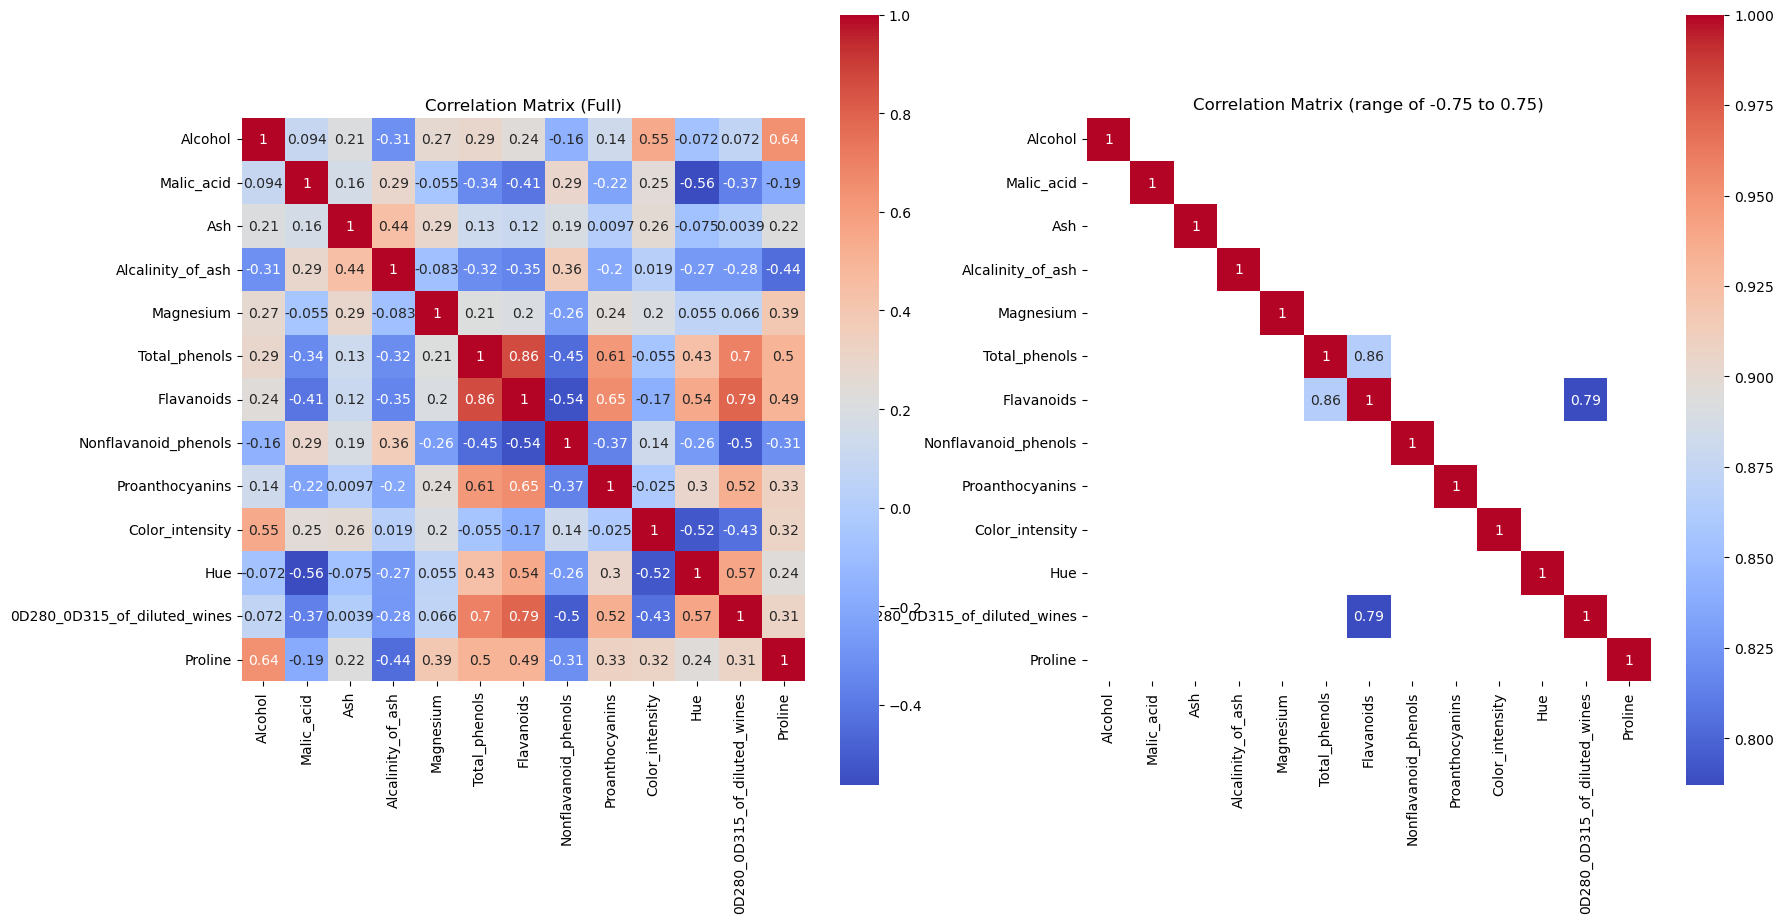

In [17]:
#show the correlation matrix and the correlation matrix with the range of -0.75 to 0.75

correlation_matrix_1 = X.corr()
correlation_matrix_2 = correlation_matrix_1[(correlation_matrix_1>0.75) | (correlation_matrix_1<-0.75)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes = axes.flatten()

sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', square=True , ax=axes[0])
axes[0].set_title('Correlation Matrix (Full)')

sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', square=True , ax=axes[1])
axes[1].set_title('Correlation Matrix (range of -0.75 to 0.75)')


By considering above heat map we can see some of the features are correlated with each other. So lets remove one of the feature column in higherly correlated pair.

Let's set the threshold to 0.75
remove `Total_phenols` and `0D280_0D315_of_diluted_wines` feature columns to avoid multicolinerity

<b>Dropping correlated variable

In [18]:
X = X.drop(['0D280_0D315_of_diluted_wines','Total_phenols'], axis=1)
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Proline
0,14.23,1.71,2.43,15.6,127,3.06,0.28,2.29,5.64,1.04,1065
1,13.20,1.78,2.14,11.2,100,2.76,0.26,1.28,4.38,1.05,1050
2,13.16,2.36,2.67,18.6,101,3.24,0.30,2.81,5.68,1.03,1185
3,14.37,1.95,2.50,16.8,113,3.49,0.24,2.18,7.80,0.86,1480
4,13.24,2.59,2.87,21.0,118,2.69,0.39,1.82,4.32,1.04,735


<b> Check the Confusion Matrix after dropping correlated features

Text(0.5, 1.0, 'Correlation Matrix (range of -0.75 to 0.75)')

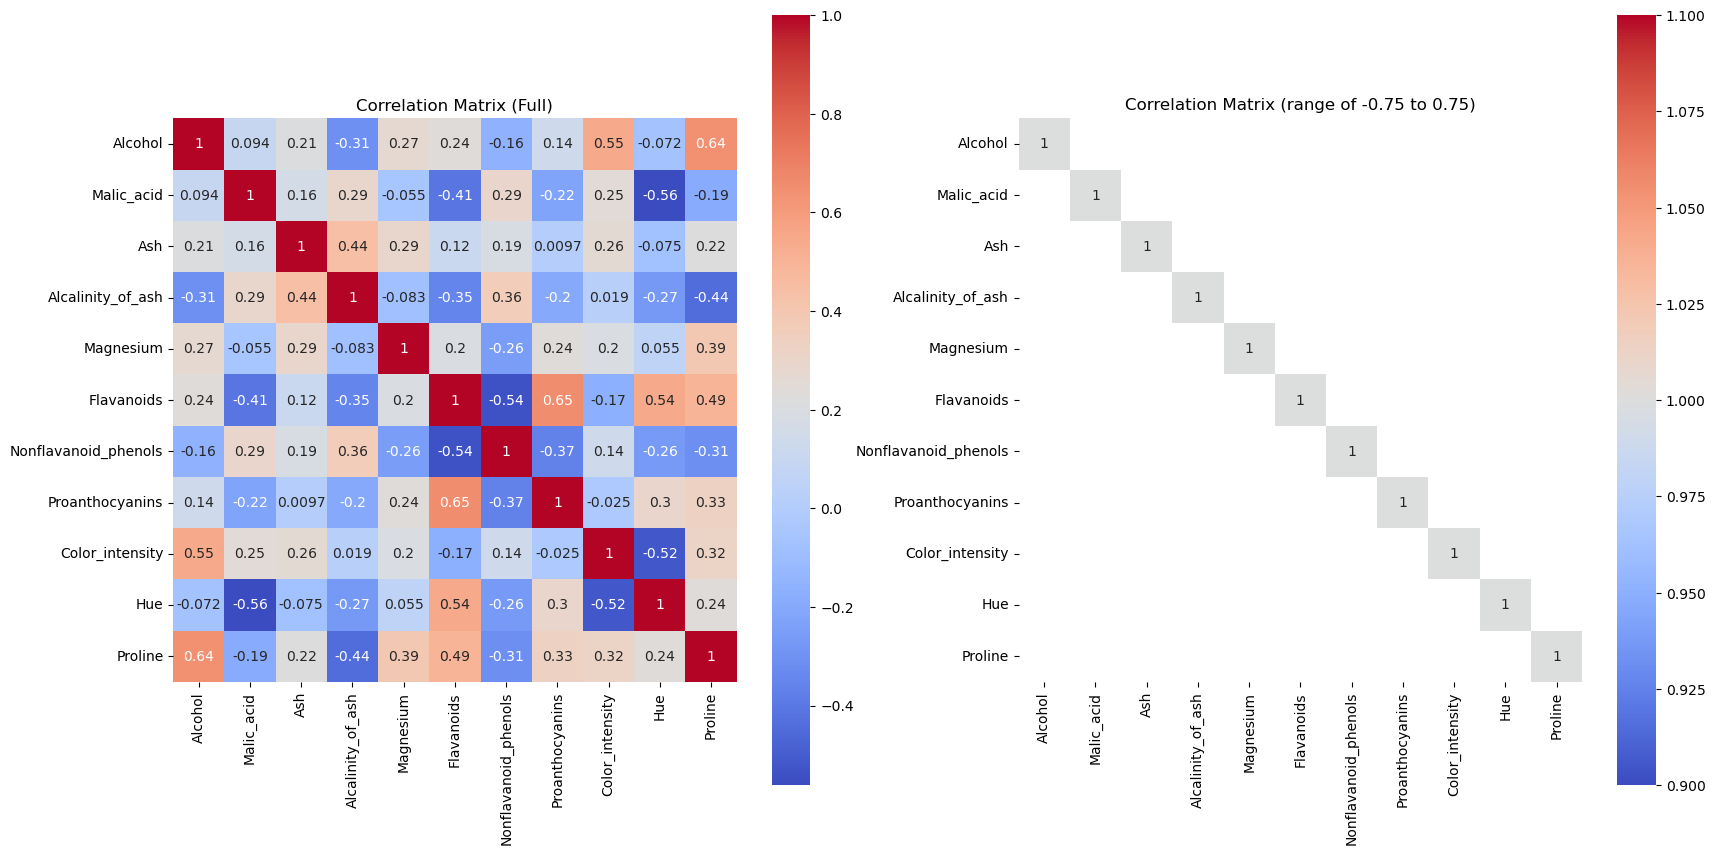

In [19]:
correlation_matrix_1 = X.corr()
correlation_matrix_2 = correlation_matrix_1[(correlation_matrix_1>0.75) | (correlation_matrix_1<-0.75)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes = axes.flatten()

sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', square=True , ax=axes[0])
axes[0].set_title('Correlation Matrix (Full)')

sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', square=True , ax=axes[1])
axes[1].set_title('Correlation Matrix (range of -0.75 to 0.75)')

<b> Standardizing data using StandardScaler

In [20]:
# Standardize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<b> Splitting training data and testing data

In [21]:
# split the scaled data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
print("Number of data that is used to train : ",len(X_train))
print("Number of data that is used to test : ",len(X_test))

Number of data that is used to train :  142
Number of data that is used to test :  36


<b>Evaluating optimal K value using Cross validation

In [26]:
# train KNN for different K values 0 - 20
k_values = range(1,21)

# store each accuracy value for corresponding k value
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score at k = ",k," : ",accuracy)
    accuracies.append(accuracy)

accuracy score at k =  1  :  0.9444444444444444
accuracy score at k =  2  :  0.9444444444444444
accuracy score at k =  3  :  0.9444444444444444
accuracy score at k =  4  :  0.9444444444444444
accuracy score at k =  5  :  0.9444444444444444
accuracy score at k =  6  :  0.9444444444444444
accuracy score at k =  7  :  0.9444444444444444
accuracy score at k =  8  :  0.9722222222222222
accuracy score at k =  9  :  0.9444444444444444
accuracy score at k =  10  :  0.9722222222222222
accuracy score at k =  11  :  0.9722222222222222
accuracy score at k =  12  :  0.9722222222222222
accuracy score at k =  13  :  0.9722222222222222
accuracy score at k =  14  :  0.9722222222222222
accuracy score at k =  15  :  0.9444444444444444
accuracy score at k =  16  :  0.9722222222222222
accuracy score at k =  17  :  0.9444444444444444
accuracy score at k =  18  :  0.9722222222222222
accuracy score at k =  19  :  0.9722222222222222
accuracy score at k =  20  :  0.9722222222222222


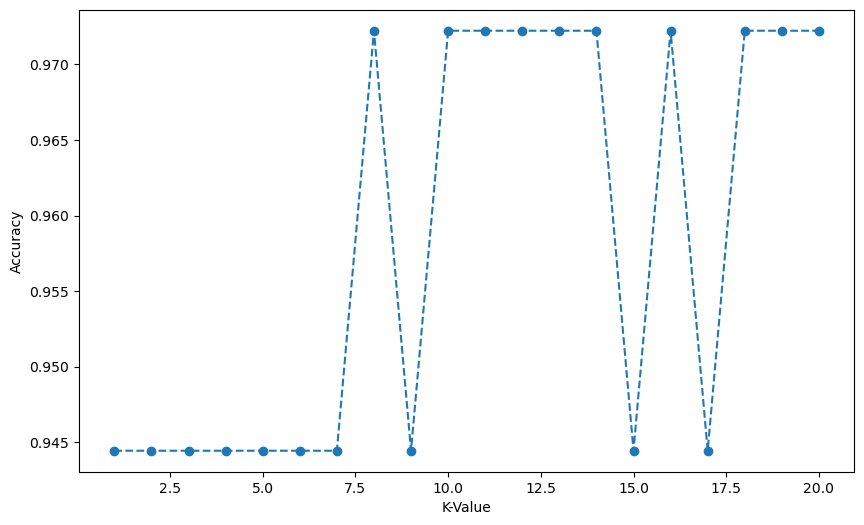

In [27]:
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', linestyle='--')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.show()

In [28]:
# find the best K value

best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f"Best value of k: {best_k} with accuracy: {best_accuracy:.2f}")

Best value of k: 8 with accuracy: 0.97


In [29]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)

# train the model using training data
knn_model.fit(X_train, y_train)

# Obtain predictions for the test data
y_pred = knn_model.predict(X_test)

In [30]:
# using predicted data draw the classification report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



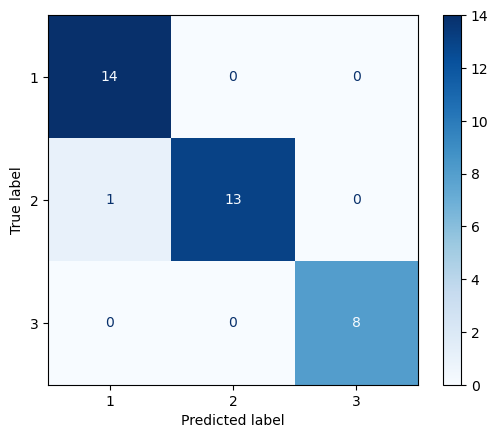

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)

# display the confusion matrix using above calculated matrix

display = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)
display.plot(cmap='Blues', values_format='d')
plt.show()